# NLP Processing with Disaster Tweets
## Problem Description
The competition focuses on leveraging Natural Language Processing (NLP) to classify tweets as related or unrelated to real disasters. Social media, especially Twitter, is widely used during emergencies to share real-time information. However, not all tweets containing disaster-related terms actually refer to real disasters (e.g., "The sky was ablaze with colors" vs. "The forest is ablaze due to wildfires"). This introduces the challenge of accurately distinguishing between figurative language and literal disaster-related tweets.

The dataset provided contains 10,000 tweets, each labeled as:

    1: The tweet describes a real disaster.
    0: The tweet does not describe a real disaster.


## Goals of the Competition
The primary goal is to build a machine learning model capable of classifying tweets as disaster-related or not disaster-related. This involves:

    1.Extracting meaningful patterns and features from the text.
    2.Training a predictive model using the labeled dataset.
    3.Generating predictions for an unseen test set to evaluate model performance.

## Evaluation
Submissions are evaluated using the F1 score, which balances Precision (correctly predicted disaster-related tweets out of all predicted disaster tweets) and Recall (correctly predicted disaster-related tweets out of all actual disaster tweets). A higher F1 score reflects better classification performance.

## Dataset Description
The dataset consists of two main files: train.csv and test.csv. These files include structured data that allows you to build and evaluate a machine learning model for tweet classification.

### Train Dataset (train.csv)
The training dataset contains 7,613 rows and the following columns:

    id: A unique identifier for each tweet.
    text: The tweet content as raw text.
    keyword: A keyword extracted from the tweet (if available). This can help identify disaster-related context.
    location: The location mentioned in the tweet (if available). May include noise or missing values.
    target: The target variable, where:
    1: The tweet is related to a real disaster.
    0: The tweet is not related to a real disaster.

### Test Dataset (test.csv)
The test dataset contains 3,263 rows and is similar to the train dataset, except it does not include the target column. Your task is to predict the target values for these tweets and submit the results.

    id: A unique identifier for each tweet.
    text: The tweet content as raw text.
    keyword: A keyword extracted from the tweet (if available).
    location: The location mentioned in the tweet (if available).


# Step1 EDA

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Loas datasets
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
# Display basic info about training and test datasets
print('Training Data Overview:')
print(train_data.info())
print('Test Data Overview')
print(test_data.info())

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
Test Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [5]:
# Check missing values in both datasets 
print('\nMissing values in Training Data:')
print(train_data.isnull().sum())
print('\nMissing Values in Test Data')
print(test_data.isnull().sum())


Missing values in Training Data:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Missing Values in Test Data
id             0
keyword       26
location    1105
text           0
dtype: int64


In [6]:
# Analyze target variable distribution
print('\nTarget Distribution:')
print(train_data['target'].value_counts(normalize=True))


Target Distribution:
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


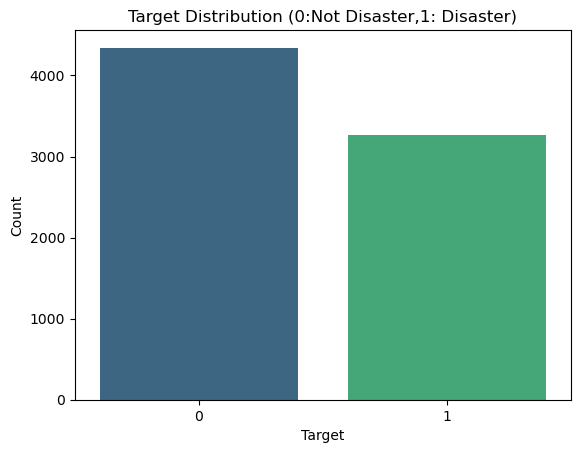

In [12]:
# Visualize the distribution of the target variable
sns.countplot(data=train_data, x='target',palette='viridis')
plt.title('Target Distribution (0:Not Disaster,1: Disaster)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


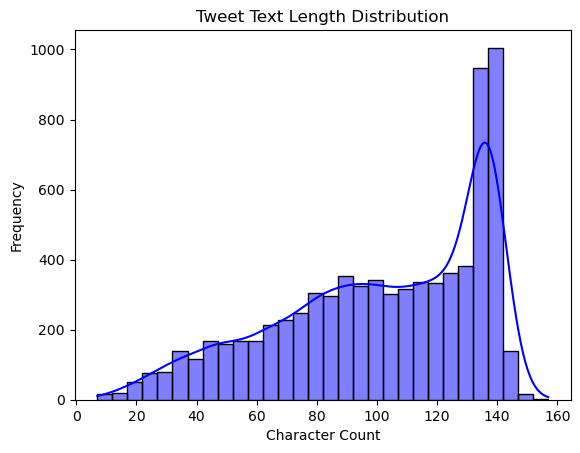

In [14]:
# Analyze tweet text length (character count and word count)
train_data['text_length']=train_data['text'].apply(len)  # Calculate character count for each tweet
train_data['word_count']=train_data['text'].apply(lambda x: len(x.split()))  # Calculate word count for each tweet
# Visualize the distribution of tweet text length
sns.histplot(train_data['text_length'], bins=30,kde=True,color='blue')
plt.title('Tweet Text Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


Top 20 Keywords for Target = 1 (Disaster-Related):
keyword
derailment               39
wreckage                 39
outbreak                 39
debris                   37
oil%20spill              37
typhoon                  37
evacuated                32
suicide%20bombing        32
rescuers                 32
suicide%20bomb           32
nuclear%20disaster       31
razed                    31
suicide%20bomber         30
earthquake               30
airplane%20accident      30
collision                29
wildfire                 29
bridge%20collapse        29
evacuation               28
buildings%20on%20fire    28
Name: count, dtype: int64

Top 20 Keywords for Target = 0 (Not Disaster-Related):
keyword
body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
aftershock     34
panic          34
screaming      34
blizzard       33
blazing        33
blaze          33
cr

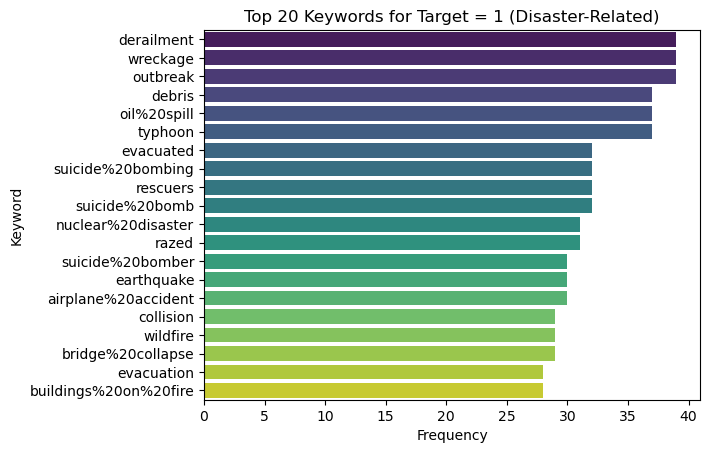

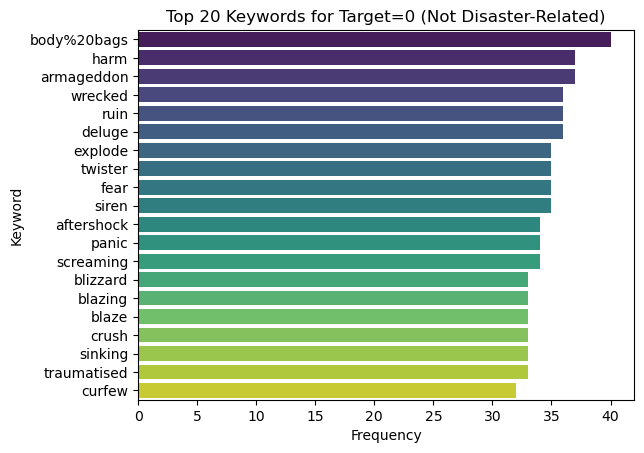

In [15]:
# VIsualize the top 20 most frequent keywords
# Filter data by target 1 (1: disaster-related, 0: not disaster-related)
target_1_keywords=train_data[train_data['target']==1]['keyword']
target_0_keywords=train_data[train_data['target']==0]['keyword']

# Count the top 20 keywords for target = 1
top_20_target_1=target_1_keywords.value_counts().head(20)
print("\nTop 20 Keywords for Target = 1 (Disaster-Related):")
print(top_20_target_1)

# Count the top 20 keywords for target = 0
top_20_target_0=target_0_keywords.value_counts().head(20)
print("\nTop 20 Keywords for Target = 0 (Not Disaster-Related):")
print(top_20_target_0)

# Plot the top20 keywords for taget 1 
sns.barplot(y=top_20_target_1.index, x=top_20_target_1.values, palette='viridis')
plt.title('Top 20 Keywords for Target = 1 (Disaster-Related)')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

# Plot the top 20 keywords for target = 0
sns.barplot(y=top_20_target_0.index,x=top_20_target_0.values, palette='viridis')
plt.title('Top 20 Keywords for Target=0 (Not Disaster-Related)')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()


# Step2 Data Preprocessing and Feature Engineering 

In [15]:
# 1. Processing 'keyword' data
# Repalce missing values in the 'keyword'column with 'missing_taget_1' or missing_target_0
train_data.loc[(train_data['keyword'].isnull()) & (train_data['target']==1),'keyword']='missing_target_1'
train_data.loc[(train_data['keyword'].isnull()) & (train_data['target']== 0),'keyword'] ='missing_target_0'

# For the test set, since we don't have the target column, replace all missing values with 'missing'
test_data['keyword'].fillna('missing',inplace=True)

# Normalize 'keyword' column,replace%20 with a space in 'keyword'column
train_data['keyword']=train_data['keyword'].str.replace('%20',' ',regex=False)
test_data['keyword']=test_data['keyword'].str.replace('%20',' ',regex=False)
# Print to verify the updated 'keyword' column
print(train_data['keyword'].unique()[:20])  # Display first 20 unique keywords
print(test_data['keyword'].unique()[:20])  

# Drop the 'location' column
train_data.drop(columns=['location'],inplace=True)
test_data.drop(columns=['location'],inplace=True)
print(train_data.columns)
print(test_data.columns)


['missing_target_1' 'missing_target_0' 'ablaze' 'accident' 'aftershock'
 'airplane accident' 'ambulance' 'annihilated' 'annihilation' 'apocalypse'
 'armageddon' 'army' 'arson' 'arsonist' 'attack' 'attacked' 'avalanche'
 'battle' 'bioterror' 'bioterrorism']
['missing' 'ablaze' 'accident' 'aftershock' 'airplane accident'
 'ambulance' 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army'
 'arson' 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze']
Index(['id', 'keyword', 'text', 'target'], dtype='object')
Index(['id', 'keyword', 'text'], dtype='object')


In [17]:
# 2.Column 'text' Precessing 
# Remove punctuation(special letters), hash tags,stop words,noise content,numbers and handling cases.
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
def clean_text(text):
    # Remove URL
    text=re.sub(r'http\S+','',text) 
    # Remove punctuation and special characters,keep hastags
    text=re.sub(r'[^a-zA-Z#\s]','',text)
    # Covert text to lowercase
    text=text.lower()
    # Remove extra spaces btw words
    text=re.sub(r'\s+','',text)
    # Remove stopwords
    text=' '.join(word for word in text.split() if word not in stop_words)  
    return text
# Apply the cleaning function to the 'text' column in the training dataset
train_data['cleaned_text']=train_data['text'].apply(clean_text)
test_data['cleaned_text']=test_data['text'].apply(clean_text)

# Display cleaned samples
train_cleaned_samples=train_data['cleaned_text'].head(10)
test_cleaned_samples=test_data['cleaned_text'].head(10)
train_cleaned_samples, test_cleaned_samples

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruizhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0    ourdeedsarethereasonofthis#earthquakemayallahf...
 1                      forestfirenearlarongesaskcanada
 2    allresidentsaskedtoshelterinplacearebeingnotif...
 3    peoplereceive#wildfiresevacuationordersincalif...
 4    justgotsentthisphotofromruby#alaskaassmokefrom...
 5    #rockyfireupdatecaliforniahwyclosedinbothdirec...
 6    #flood#disasterheavyraincausesflashfloodingofs...
 7            imontopofthehillandicanseeafireinthewoods
 8    theresanemergencyevacuationhappeningnowinthebu...
 9              imafraidthatthetornadoiscomingtoourarea
 Name: cleaned_text, dtype: object,
 0                        justhappenedaterriblecarcrash
 1    heardabout#earthquakeisdifferentcitiesstaysafe...
 2    thereisaforestfireatspotpondgeesearefleeingacr...
 3                 apocalypselighting#spokane#wildfires
 4                 typhoonsoudelorkillsinchinaandtaiwan
 5                           wereshakingitsanearthquake
 6    theydprobablystillshowmorelifethanarsenaldidye...
 7          

In [19]:
# 3.Feature Engineering
# Frequency Encoding
keyword_frequency=train_data['keyword'].value_counts()

# Map frequency to 'keyword'column
train_data['keyword_frequency']=train_data['keyword'].map(keyword_frequency)
test_data['keyword_frequency'] = test_data['keyword'].map(keyword_frequency).fillna(0)

# Display the transformed column
print(keyword_frequency)

keyword
fatalities             45
missing_target_1       42
deluge                 42
armageddon             42
sinking                41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: count, Length: 223, dtype: int64


In [21]:
print(train_data.head(150))

      id            keyword  \
0      1   missing_target_1   
1      4   missing_target_1   
2      5   missing_target_1   
3      6   missing_target_1   
4      7   missing_target_1   
..   ...                ...   
145  209  airplane accident   
146  210  airplane accident   
147  211  airplane accident   
148  212  airplane accident   
149  213  airplane accident   

                                                  text  target  \
0    Our Deeds are the Reason of this #earthquake M...       1   
1               Forest fire near La Ronge Sask. Canada       1   
2    All residents asked to 'shelter in place' are ...       1   
3    13,000 people receive #wildfires evacuation or...       1   
4    Just got sent this photo from Ruby #Alaska as ...       1   
..                                                 ...     ...   
145  #Horrible #Accident Man Died In Wings Airplane...       1   
146  Experts in France begin examining airplane deb...       1   
147  Experts in France begin exam

In [27]:
print(train_data.columns)
print(test_data.columns)

Index(['id', 'keyword', 'text', 'target', 'text_length', 'word_count',
       'cleaned_text', 'keyword_frequency'],
      dtype='object')
Index(['id', 'keyword', 'text', 'cleaned_text', 'keyword_frequency'], dtype='object')


In [29]:
# 4.Text Tokenization and Sequence Padding/Truncation"
!pip install tensorflow

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Toekdnize the train data
# Initialized the tokenizer and fit it on the 'cleaned_text' column
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data['cleaned_text'])

# Convert text to sequences of integers
train_sequences=tokenizer.texts_to_sequences(train_data['cleaned_text'])
test_sequences=tokenizer.texts_to_sequences(test_data['cleaned_text'])

# Define max length and apply padding and truncation 
max_length=140

# Pad and truncate the sequences to the same length 
train_padded=pad_sequences(train_sequences,maxlen=max_length,padding='post',truncating='post')
test_padded=pad_sequences(test_sequences, maxlen=max_length,padding='post',truncating='post')

# Verify the results 
print(f"Sample padded train sequence:\n{train_padded[:1]}")
print(f"Shape of padded train data: {train_padded.shape}")
print(f"Shape of padded test data: {test_padded.shape}")

Sample padded train sequence:
[[709 710   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
Shape of padded train data: (7613, 140)
Shape of padded test data: (3263, 140)


In [25]:
# 5.Words Embedding
# Loading GloVe and creating embedding matrix
from tensorflow.keras.layers import Embedding 

# Define paths 
glove_file_path='/Users/ruizhang/Desktop/master /ML/Deep Learning/RNN-Recurrent 循环处理/glove.6B/glove.6B.100d.txt'
embedding_dim=100 # Set the dimension of GloVe vectors

# Load GloVe embeddings
embeddings_index={}
with open(glove_file_path,'r',encoding='utf-8') as f :
    for line in f:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:],dtype='float32')
        embeddings_index[word]=coefs
print(f'Loaded{len(embeddings_index)} word vectors from GloVe')

# Create embedding matrix
word_index=tokenizer.word_index # Get the word_index mapping from the tokenizer
vocab_size=len(word_index)+1 # Add 1 because indexing starts from 1 
embedding_matrix=np.zeros((vocab_size,embedding_dim))

for word,i in word_index.items():
    embedding_vector=embeddings_index.get(word)  # Get GloVe vectorfor the word
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector # If found in Glove,use it 
    else:
        embedding_matrix[i]=np.random.normal(size=(embedding_dim))

print(f'Embedding matrix created with shape {embedding_matrix.shape}.')
        

Loaded400000 word vectors from GloVe
Embedding matrix created with shape (8771, 100).


# Step3 Model Architecture-LSTM Model

In [27]:
# Use the embedding matrix to initialize the Embedding layer
# Pass the embedding matrix to the embedding layer, and build your RNN/LSTM model
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
# Custom F1- score metric
def f1_score(y_true,y_pred):
    y_true=K.cast(y_true,'float32')  # Convert y_true to float32
    y_pred=K.round(y_pred)  # Round predicted values to 0 or 1
    tp=K.sum(K.cast(y_true*y_pred,'float'), axis=0)  # True positives
    fp=K.sum(K.cast((1-y_true)*y_pred,'float'), axis=0)  # False positives
    fn=K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)  # False negatives

    precision=tp/(tp+fp+K.epsilon())  # Precision
    recall=tp/(tp+fn+K.epsilon())  # Recall
    
    f1=2*(precision*recall)/(precision+recall+K.epsilon())  # F1-score
    return K.mean(f1)

    
# Define model
model=Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False),
    #Add LSTM layer    
    LSTM(128,return_sequences=True),
    Dropout(0.2), # Add dropout for regularization
    LSTM(64),     # Add an additional LSTM layer for experimentation
    Dense(1,activation='sigmoid') # Output layer for binary classification
])

# Complie the model
optimizer = Adam(learning_rate=1e-3)  # Reduce learning rate
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',f1_score])

# Build the model by specifying an input shape
model.build(input_shape=(None,max_length))

# Display model summary
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 140, 100)       │       877,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 140, 128)       │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 140, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,043,821 (3.98 MB)

 Trainable params: 166,721 (651.25 KB)

 Non-trainable params: 877,100 (3.35 MB)

# Step4 Model training

In [48]:
print(train_data['target'].value_counts())

target
0    4342
1    3271
Name: count, dtype: int64


In [50]:
# Train in model with validation split
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
class_weight={0: 1, 1: 1.5}  # give more weright on 1
history=model.fit(
    train_padded,
    train_data['target'],
    validation_split=0.2,  # 20% of the data will be used for validation
    epochs=10,             # Set the number of epochs 
    batch_size=32, 
    class_weight=class_weight,  # Use class weights
    callbacks=[early_stopping], # Set the batch size (you can adjust)
    verbose=1              # Print progress during training
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.4289 - f1_score: 0.5678 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6960
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.4247 - f1_score: 0.5902 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6966
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.4120 - f1_score: 0.5777 - loss: 0.8357 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6961
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.4263 - f1_score: 0.5928 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6956
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.4156 - f1_score: 0.5834 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6974
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.4201 - f1_score: 0.5874 - loss: 0.8380 - val_accuracy: 0.4655 - va

In [52]:
# Evaluation 
from sklearn.metrics import f1_score

# Prediction on validation set 
val_predictions=model.predict(train_padded)
val_predictions=(val_predictions>0.5).astype(int)  # Convert probabilities to binary labels

# Calculate F1 score
f1=f1_score(train_data['target'], val_predictions)
print(f"F1 Score on validation set: {f1:.4f}")

238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step
F1 Score on validation set: 0.6011


## Hyperparameters Tuning

In [29]:
# Custom F1- score metric
def f1_score(y_true,y_pred):
    y_true=K.cast(y_true,'float32')  # Convert y_true to float32
    y_pred=K.round(y_pred)  # Round predicted values to 0 or 1
    tp=K.sum(K.cast(y_true*y_pred,'float'),axis=0)  # True positives
    fp=K.sum(K.cast((1-y_true)*y_pred,'float'),axis=0)  # False positives
    fn=K.sum(K.cast(y_true*(1-y_pred), 'float'),axis=0)  # False negatives

    precision=tp/(tp+fp+K.epsilon())  # Precision
    recall=tp/(tp+fn+K.epsilon())  # Recall
    
    f1=2*(precision*recall)/(precision+recall+K.epsilon())  # F1-score
    return K.mean(f1)
# Define hyperparameter
learning_rates=[1e-4, 5e-4, 1e-3]
batch_sizes=[16, 32, 64]
dropouts=[0.2, 0.3, 0.4]
lstm_units=[64, 128, 256]

# Save best patameters
best_f1=0
best_params={}

for lr in learning_rates:
    for batch_size in batch_sizes:
        for dropout_rate in dropouts:
            for units in lstm_units:
                print(f"Training with lr={lr}, batch_size={batch_size}, dropout={dropout_rate}, units={units}")
                
                # Define model
                model=Sequential([
                    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length,trainable=False),
                    LSTM(units, return_sequences=True),
                    Dropout(dropout_rate),
                    LSTM(64),
                    Dense(1, activation='sigmoid')
                ])
                
                optimizer=Adam(learning_rate=lr)
                model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy', f1_score])
                
                early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
                
                # Model training
                class_weight={0: 1, 1: 1.5}
                history=model.fit(
                    train_padded, 
                    train_data['target'], 
                    validation_split=0.2, 
                    epochs=10, 
                    batch_size=batch_size, 
                    callbacks=[early_stopping],
                    class_weight=class_weight,
                    verbose=1
                )            
               

Training with lr=0.0001, batch_size=16, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.4576 - f1_score: 0.4424 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6959
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4289 - f1_score: 0.5907 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6960
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4163 - f1_score: 0.5743 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6964
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4311 - f1_score: 0.5917 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6957
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4203 - f1_score: 0.5829 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6964
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4248 - f1_score: 0.5867 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.587

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.5461 - f1_score: 0.1815 - loss: 0.8334 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.7037
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.4170 - f1_score: 0.5786 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6982
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.4227 - f1_score: 0.5840 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6975
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.4167 - f1_score: 0.5772 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6977
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.4147 - f1_score: 0.5759 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6980
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.4181 - f1_score: 0.5784 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score: 0.587

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.4282 - f1_score: 0.5579 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6953
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - accuracy: 0.4302 - f1_score: 0.5931 - loss: 0.8405 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6954
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 143ms/step - accuracy: 0.4174 - f1_score: 0.5765 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6972
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 144ms/step - accuracy: 0.4306 - f1_score: 0.5890 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6949
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 145ms/step - accuracy: 0.4287 - f1_score: 0.5895 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6963
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 146ms/step - accuracy: 0.4341 - f1_score: 0.5929 - loss: 0.8413 - val_accuracy: 0.4655 - val_f1_score:

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4153 - f1_score: 0.5670 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6987
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4202 - f1_score: 0.5809 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6973
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4146 - f1_score: 0.5767 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6979
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.4143 - f1_score: 0.5757 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6975
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4342 - f1_score: 0.5931 - loss: 0.8410 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6963
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4233 - f1_score: 0.5852 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.587

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.4210 - f1_score: 0.5726 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6966
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.4205 - f1_score: 0.5804 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6966
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.4298 - f1_score: 0.5918 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6956
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.4212 - f1_score: 0.5832 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6969
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.4141 - f1_score: 0.5737 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6976
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.4119 - f1_score: 0.5721 - loss: 0.8359 - val_accuracy: 0.4655 - val_f1_score: 0.587

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 144ms/step - accuracy: 0.4279 - f1_score: 0.5124 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6985
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 144ms/step - accuracy: 0.4206 - f1_score: 0.5792 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6966
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - accuracy: 0.4146 - f1_score: 0.5749 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6975
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - accuracy: 0.4197 - f1_score: 0.5808 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 144ms/step - accuracy: 0.4244 - f1_score: 0.5855 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6961
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - accuracy: 0.4219 - f1_score: 0.5802 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score:

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4261 - f1_score: 0.5748 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6965
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4233 - f1_score: 0.5834 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6961
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4255 - f1_score: 0.5871 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6960
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4228 - f1_score: 0.5842 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6961
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4136 - f1_score: 0.5746 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6972
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4264 - f1_score: 0.5883 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score: 0.587

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.5068 - f1_score: 0.3201 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6954
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.4240 - f1_score: 0.5859 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6964
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.4242 - f1_score: 0.5842 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.4174 - f1_score: 0.5766 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6970
Training with lr=0.0001, batch_size=16, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.4267 - f1_score: 0.5774 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6952
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.4327 - f1_score: 0.5943 - loss: 0.8409 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6951
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - accuracy: 0.4171 - f1_score: 0.5782 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 140ms/step - accuracy: 0.4165 - f1_score: 0.5784 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6958
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 140ms/step - accuracy: 0.4189 - f1_score: 0.5783 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6967
Training with lr=0.0001, batch_size=32, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.4239 - f1_score: 0.5713 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6953
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4148 - f1_score: 0.5812 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6973
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4192 - f1_score: 0.5850 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6967
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.4162 - f1_score: 0.5833 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6973
Training with lr=0.0001, batch_size=32, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.4657 - f1_score: 0.4266 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6955
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4140 - f1_score: 0.5798 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6968
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4149 - f1_score: 0.5811 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4312 - f1_score: 0.5979 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6951
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4218 - f1_score: 0.5881 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.4310 - f1_score: 0.5977 - loss: 0.8405 - val_accuracy: 0.4655 - val_f1_score:

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.4199 - f1_score: 0.5658 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6962
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - accuracy: 0.4274 - f1_score: 0.5923 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6953
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 517s 3s/step - accuracy: 0.4215 - f1_score: 0.5880 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6956
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 203ms/step - accuracy: 0.4245 - f1_score: 0.5902 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.4241 - f1_score: 0.5905 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Training with lr=0.0001, batch_size=32, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.4222 - f1_score: 0.5665 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6966
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4144 - f1_score: 0.5806 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6966
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4292 - f1_score: 0.5938 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4189 - f1_score: 0.5854 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6969
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4140 - f1_score: 0.5815 - loss: 0.8362 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6975
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4170 - f1_score: 0.5834 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.596

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.4862 - f1_score: 0.3467 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6974
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4205 - f1_score: 0.5870 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6966
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4257 - f1_score: 0.5927 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6968
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - accuracy: 0.4152 - f1_score: 0.5806 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6972
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4147 - f1_score: 0.5817 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6977
Training with lr=0.0001, batch_size=32, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 289ms/step - accuracy: 0.4306 - f1_score: 0.5754 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6955
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 213ms/step - accuracy: 0.4250 - f1_score: 0.5920 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6965
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 124s 652ms/step - accuracy: 0.4215 - f1_score: 0.5884 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6958
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.4224 - f1_score: 0.5891 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6959
Training with lr=0.0001, batch_size=32, dropout=0.4, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.4343 - f1_score: 0.5775 - loss: 0.8412 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6955
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4211 - f1_score: 0.5882 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6969
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4204 - f1_score: 0.5870 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6972
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4185 - f1_score: 0.5851 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6972
Training with lr=0.0001, batch_size=32, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.4274 - f1_score: 0.5735 - loss: 0.8407 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6955
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 85s 446ms/step - accuracy: 0.4160 - f1_score: 0.5826 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6976
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.4199 - f1_score: 0.5879 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6966
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.4195 - f1_score: 0.5861 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Training with lr=0.0001, batch_size=32, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - accuracy: 0.4232 - f1_score: 0.5678 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 219ms/step - accuracy: 0.4165 - f1_score: 0.5815 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6995
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 59s 312ms/step - accuracy: 0.4098 - f1_score: 0.5750 - loss: 0.8357 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6984
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.4208 - f1_score: 0.5862 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6978
Training with lr=0.0001, batch_size=64, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4301 - f1_score: 0.5606 - loss: 0.8401 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6950
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.4253 - f1_score: 0.5942 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6964
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4244 - f1_score: 0.5927 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6964
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4150 - f1_score: 0.5838 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Training with lr=0.0001, batch_size=64, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.4540 - f1_score: 0.4726 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6957
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - accuracy: 0.4277 - f1_score: 0.5969 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6961
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.4230 - f1_score: 0.5920 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.4250 - f1_score: 0.5936 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6968
Training with lr=0.0001, batch_size=64, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.4385 - f1_score: 0.5080 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 883ms/step - accuracy: 0.4188 - f1_score: 0.5885 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6968
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 576ms/step - accuracy: 0.4278 - f1_score: 0.5966 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6968
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 299ms/step - accuracy: 0.4140 - f1_score: 0.5827 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6974
Training with lr=0.0001, batch_size=64, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.4322 - f1_score: 0.5631 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6951
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4100 - f1_score: 0.5794 - loss: 0.8350 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6962
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4052 - f1_score: 0.5718 - loss: 0.8339 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6971
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4255 - f1_score: 0.5932 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6970
Training with lr=0.0001, batch_size=64, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.4260 - f1_score: 0.5604 - loss: 0.8409 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6952
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.4258 - f1_score: 0.5949 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6963
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.4232 - f1_score: 0.5925 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6959
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 343ms/step - accuracy: 0.4162 - f1_score: 0.5849 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Training with lr=0.0001, batch_size=64, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accuracy: 0.4313 - f1_score: 0.5631 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6951
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 290ms/step - accuracy: 0.4213 - f1_score: 0.5906 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6959
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step - accuracy: 0.4250 - f1_score: 0.5941 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 282ms/step - accuracy: 0.4142 - f1_score: 0.5824 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Training with lr=0.0001, batch_size=64, dropout=0.4, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.4226 - f1_score: 0.5537 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6950
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.4200 - f1_score: 0.5890 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.4121 - f1_score: 0.5797 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6972
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.4330 - f1_score: 0.6014 - loss: 0.8409 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6968
Training with lr=0.0001, batch_size=64, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 408ms/step - accuracy: 0.4363 - f1_score: 0.5691 - loss: 0.8445 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6951
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.4156 - f1_score: 0.5847 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6964
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.4219 - f1_score: 0.5912 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.4215 - f1_score: 0.5909 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6970
Training with lr=0.0001, batch_size=64, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 300ms/step - accuracy: 0.4472 - f1_score: 0.5150 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6964
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.4167 - f1_score: 0.5853 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6961
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - accuracy: 0.4177 - f1_score: 0.5866 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6959
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.4170 - f1_score: 0.5867 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6970
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.4331 - f1_score: 0.6012 - loss: 0.8411 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 295ms/step - accuracy: 0.4153 - f1_score: 0.5850 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_lo

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.4429 - f1_score: 0.5150 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6935
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4244 - f1_score: 0.5849 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4077 - f1_score: 0.5674 - loss: 0.8346 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.7013
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4157 - f1_score: 0.5768 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6965
Training with lr=0.0005, batch_size=16, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 149s 389ms/step - accuracy: 0.4274 - f1_score: 0.5776 - loss: 0.8411 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6941
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 105s 276ms/step - accuracy: 0.4237 - f1_score: 0.5842 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6961
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.4299 - f1_score: 0.5911 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6958
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 105s 276ms/step - accuracy: 0.4143 - f1_score: 0.5749 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6980
Training with lr=0.0005, batch_size=16, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 139ms/step - accuracy: 0.4293 - f1_score: 0.5779 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6964
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.4221 - f1_score: 0.5836 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6951
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.4259 - f1_score: 0.5860 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6951
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.4118 - f1_score: 0.5727 - loss: 0.8356 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6980
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.4154 - f1_score: 0.5752 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6967
Training with lr=0.0005, batch_size=16, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 120s 313ms/step - accuracy: 0.4323 - f1_score: 0.5805 - loss: 0.8422 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6949
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.4327 - f1_score: 0.5930 - loss: 0.8413 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6959
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4175 - f1_score: 0.5779 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6978
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 97s 255ms/step - accuracy: 0.4191 - f1_score: 0.5816 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Training with lr=0.0005, batch_size=16, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.4425 - f1_score: 0.4909 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6942
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 0.4270 - f1_score: 0.5877 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6955
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - accuracy: 0.4113 - f1_score: 0.5733 - loss: 0.8355 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6979
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.4236 - f1_score: 0.5849 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6958
Training with lr=0.0005, batch_size=16, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 353s 925ms/step - accuracy: 0.4271 - f1_score: 0.5788 - loss: 0.8419 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6953
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 148ms/step - accuracy: 0.4257 - f1_score: 0.5864 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6971
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - accuracy: 0.4169 - f1_score: 0.5775 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.7008
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 49s 129ms/step - accuracy: 0.4225 - f1_score: 0.5842 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6965
Training with lr=0.0005, batch_size=16, dropout=0.4, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.4506 - f1_score: 0.4690 - loss: 0.8400 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6953
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4249 - f1_score: 0.5873 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6959
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4262 - f1_score: 0.5874 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6953
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4174 - f1_score: 0.5770 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6963
Training with lr=0.0005, batch_size=16, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.4302 - f1_score: 0.5591 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6952
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 123ms/step - accuracy: 0.4145 - f1_score: 0.5752 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6989
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.4246 - f1_score: 0.5841 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6959
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 187s 492ms/step - accuracy: 0.4254 - f1_score: 0.5866 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6956
Training with lr=0.0005, batch_size=16, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 52s 135ms/step - accuracy: 0.4274 - f1_score: 0.5743 - loss: 0.8410 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6973
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 725s 2s/step - accuracy: 0.4287 - f1_score: 0.5889 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6960
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - accuracy: 0.4230 - f1_score: 0.5833 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6957
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.4214 - f1_score: 0.5842 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6965
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 994s 3s/step - accuracy: 0.4215 - f1_score: 0.5830 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6968
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - accuracy: 0.4227 - f1_score: 0.5813 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.5

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.4548 - f1_score: 0.4705 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6963
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4134 - f1_score: 0.5798 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.7016
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.4215 - f1_score: 0.5886 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6962
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.4192 - f1_score: 0.5851 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6973
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4204 - f1_score: 0.5852 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6970
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.4198 - f1_score: 0.5869 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5967

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.4136 - f1_score: 0.5595 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6963
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.4247 - f1_score: 0.5905 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6948
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4235 - f1_score: 0.5898 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6960
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 961s 5s/step - accuracy: 0.4191 - f1_score: 0.5854 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6961
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.4261 - f1_score: 0.5912 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6976
Training with lr=0.0005, batch_size=32, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.4370 - f1_score: 0.5829 - loss: 0.8433 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6942
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.4348 - f1_score: 0.5999 - loss: 0.8427 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6953
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 190ms/step - accuracy: 0.4275 - f1_score: 0.5940 - loss: 0.8401 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6956
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1083s 6s/step - accuracy: 0.4293 - f1_score: 0.5949 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6963
Training with lr=0.0005, batch_size=32, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.4313 - f1_score: 0.5767 - loss: 0.8418 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6948
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4130 - f1_score: 0.5774 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.7000
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4154 - f1_score: 0.5818 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6971
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.4069 - f1_score: 0.5736 - loss: 0.8343 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.7023
Training with lr=0.0005, batch_size=32, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.4306 - f1_score: 0.5351 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6952
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.4204 - f1_score: 0.5867 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6955
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 924s 5s/step - accuracy: 0.4204 - f1_score: 0.5864 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6952
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.4154 - f1_score: 0.5801 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6975
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4163 - f1_score: 0.5834 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6958
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.4193 - f1_score: 0.5856 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.4296 - f1_score: 0.5754 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6954
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.4251 - f1_score: 0.5725 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6975
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.4275 - f1_score: 0.5942 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6954
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.4229 - f1_score: 0.5891 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 278ms/step - accuracy: 0.4187 - f1_score: 0.5849 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.4322 - f1_score: 0.5982 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score: 0

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.5003 - f1_score: 0.3340 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6967
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4267 - f1_score: 0.5926 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6977
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.4250 - f1_score: 0.5913 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6963
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.4200 - f1_score: 0.5856 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6965
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4081 - f1_score: 0.5744 - loss: 0.8348 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6992
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.4213 - f1_score: 0.5883 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score: 0.596

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 924s 5s/step - accuracy: 0.4596 - f1_score: 0.4693 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6961
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.4232 - f1_score: 0.5898 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6970
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4136 - f1_score: 0.5787 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4145 - f1_score: 0.5810 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Training with lr=0.0005, batch_size=32, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.4212 - f1_score: 0.5668 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6984
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 979s 5s/step - accuracy: 0.4099 - f1_score: 0.5758 - loss: 0.8356 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.7013
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.4086 - f1_score: 0.5746 - loss: 0.8353 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.7025
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.4142 - f1_score: 0.5814 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6971
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.4224 - f1_score: 0.5891 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6958
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - accuracy: 0.4210 - f1_score: 0.5882 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.4526 - f1_score: 0.4334 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6968
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.4219 - f1_score: 0.5903 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6957
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.4226 - f1_score: 0.5911 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6957
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4229 - f1_score: 0.5919 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6967
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4194 - f1_score: 0.5877 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6967
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4227 - f1_score: 0.5921 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.4308 - f1_score: 0.5028 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6962
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.4252 - f1_score: 0.5944 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6953
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.4187 - f1_score: 0.5882 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6967
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.4200 - f1_score: 0.5894 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6962
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.4189 - f1_score: 0.5885 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Training with lr=0.0005, batch_size=64, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.4292 - f1_score: 0.5607 - loss: 0.8400 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6953
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.4220 - f1_score: 0.5914 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6956
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.4221 - f1_score: 0.5902 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 313ms/step - accuracy: 0.4151 - f1_score: 0.5841 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6974
Training with lr=0.0005, batch_size=64, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4304 - f1_score: 0.5613 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6968
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4197 - f1_score: 0.5887 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6971
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.4199 - f1_score: 0.5885 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6958
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.4254 - f1_score: 0.5944 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6962
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.4172 - f1_score: 0.5867 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6972
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.4323 - f1_score: 0.6005 - loss: 0.8409 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_los

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.4395 - f1_score: 0.5085 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6995
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.4159 - f1_score: 0.5847 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6963
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.4163 - f1_score: 0.5855 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6967
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - accuracy: 0.4254 - f1_score: 0.5945 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6960
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.4256 - f1_score: 0.5940 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.4243 - f1_score: 0.5929 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - va

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.4362 - f1_score: 0.5664 - loss: 0.8405 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6946
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 305ms/step - accuracy: 0.4197 - f1_score: 0.5880 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6962
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.4128 - f1_score: 0.5813 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.4153 - f1_score: 0.5839 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6977
Training with lr=0.0005, batch_size=64, dropout=0.4, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.4754 - f1_score: 0.4128 - loss: 0.8401 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6947
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4246 - f1_score: 0.5942 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6964
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.4251 - f1_score: 0.5940 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6970
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.4212 - f1_score: 0.5903 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Training with lr=0.0005, batch_size=64, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.4335 - f1_score: 0.4817 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.4229 - f1_score: 0.5910 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6953
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.4227 - f1_score: 0.5922 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.4106 - f1_score: 0.5798 - loss: 0.8354 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6988
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.4245 - f1_score: 0.5937 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6961
Training with lr=0.0005, batch_size=64, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.5449 - f1_score: 0.1881 - loss: 0.8332 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.7133
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - accuracy: 0.4160 - f1_score: 0.5847 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6976
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 314ms/step - accuracy: 0.4083 - f1_score: 0.5758 - loss: 0.8352 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6991
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.4125 - f1_score: 0.5811 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6982
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 301ms/step - accuracy: 0.4217 - f1_score: 0.5904 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6950
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 309ms/step - accuracy: 0.4194 - f1_score: 0.5888 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - va

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.4419 - f1_score: 0.5145 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6963
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4079 - f1_score: 0.5696 - loss: 0.8347 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6989
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4219 - f1_score: 0.5805 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6967
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.4157 - f1_score: 0.5764 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6961
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4230 - f1_score: 0.5833 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4144 - f1_score: 0.5478 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score: 0.587

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.4291 - f1_score: 0.5786 - loss: 0.8411 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6943
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.4204 - f1_score: 0.5812 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6973
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.4140 - f1_score: 0.5759 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6956
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.4167 - f1_score: 0.5779 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6986
Training with lr=0.001, batch_size=16, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 139ms/step - accuracy: 0.5058 - f1_score: 0.3322 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6995
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 140ms/step - accuracy: 0.4256 - f1_score: 0.5718 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6959
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.4205 - f1_score: 0.5819 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6972
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.4195 - f1_score: 0.5801 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6974
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - accuracy: 0.4216 - f1_score: 0.5842 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6989
Training with lr=0.001, batch_size=16, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.4316 - f1_score: 0.4914 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6961
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4074 - f1_score: 0.5663 - loss: 0.8345 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6989
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4167 - f1_score: 0.5769 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6974
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.4073 - f1_score: 0.5678 - loss: 0.8348 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.7010
Training with lr=0.001, batch_size=16, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.4361 - f1_score: 0.4908 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6967
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.4188 - f1_score: 0.5794 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6975
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.4245 - f1_score: 0.5827 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6977
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 32s 84ms/step - accuracy: 0.4139 - f1_score: 0.5720 - loss: 0.8362 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6971
Training with lr=0.001, batch_size=16, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 144ms/step - accuracy: 0.4369 - f1_score: 0.5074 - loss: 0.8497 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6940
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 144ms/step - accuracy: 0.4390 - f1_score: 0.5975 - loss: 0.8435 - val_accuracy: 0.5345 - val_f1_score: 0.0000e+00 - val_loss: 0.6924
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 58s 153ms/step - accuracy: 0.4866 - f1_score: 0.3952 - loss: 0.8356 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6951
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 57s 148ms/step - accuracy: 0.4251 - f1_score: 0.5865 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6981
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 146ms/step - accuracy: 0.4221 - f1_score: 0.5827 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6959
Training with lr=0.001, batch_size=16, dropout=0.4, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4283 - f1_score: 0.5758 - loss: 0.8412 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4246 - f1_score: 0.5440 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6958
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4123 - f1_score: 0.5725 - loss: 0.8359 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6962
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4216 - f1_score: 0.5821 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6967
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4085 - f1_score: 0.5683 - loss: 0.8348 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6986
Training with lr=0.001, batch_size=16, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 35s 87ms/step - accuracy: 0.4278 - f1_score: 0.5490 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6944
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.4263 - f1_score: 0.5847 - loss: 0.8400 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6981
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.4263 - f1_score: 0.5880 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6951
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.4132 - f1_score: 0.5747 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6986
Training with lr=0.001, batch_size=16, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - accuracy: 0.4236 - f1_score: 0.5630 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6961
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 148ms/step - accuracy: 0.4294 - f1_score: 0.5890 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6956
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 154ms/step - accuracy: 0.4145 - f1_score: 0.5747 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6974
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 145ms/step - accuracy: 0.4122 - f1_score: 0.5724 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6971
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.4271 - f1_score: 0.5886 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.5879 - val_loss: 0.6950
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 52s 136ms/step - accuracy: 0.4368 - f1_score: 0.5761 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score:

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.4165 - f1_score: 0.5642 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.7014
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.4272 - f1_score: 0.5947 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6960
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.4235 - f1_score: 0.5907 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6960
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4231 - f1_score: 0.5901 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4314 - f1_score: 0.5958 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6953
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4171 - f1_score: 0.5848 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.596

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.4678 - f1_score: 0.4437 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4313 - f1_score: 0.5966 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6959
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.4131 - f1_score: 0.5792 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6973
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.4279 - f1_score: 0.5937 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6969
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.4172 - f1_score: 0.5840 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6971
Training with lr=0.001, batch_size=32, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.4710 - f1_score: 0.4066 - loss: 0.8359 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6959
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.4241 - f1_score: 0.5904 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6961
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.4253 - f1_score: 0.5916 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6953
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - accuracy: 0.4205 - f1_score: 0.5867 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6971
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - accuracy: 0.4156 - f1_score: 0.5819 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6963
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - accuracy: 0.4233 - f1_score: 0.5863 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score:

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.4360 - f1_score: 0.5809 - loss: 0.8412 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6950
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4224 - f1_score: 0.5866 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6974
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.4266 - f1_score: 0.5929 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6948
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4279 - f1_score: 0.4848 - loss: 0.8337 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.7000
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4187 - f1_score: 0.5851 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6965
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.4081 - f1_score: 0.5742 - loss: 0.8347 - val_accuracy: 0.4655 - val_f1_score: 0.596

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.4918 - f1_score: 0.3694 - loss: 0.8358 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6968
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4154 - f1_score: 0.5804 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6953
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.4236 - f1_score: 0.5886 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6957
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4122 - f1_score: 0.5780 - loss: 0.8358 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6979
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4153 - f1_score: 0.5824 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6963
Training with lr=0.001, batch_size=32, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.4308 - f1_score: 0.5241 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6959
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step - accuracy: 0.4234 - f1_score: 0.5902 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6970
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.4177 - f1_score: 0.5833 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6960
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 188ms/step - accuracy: 0.4176 - f1_score: 0.5844 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6980
Training with lr=0.001, batch_size=32, dropout=0.4, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.4356 - f1_score: 0.5274 - loss: 0.8393 - val_accuracy: 0.5345 - val_f1_score: 0.0000e+00 - val_loss: 0.6929
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.5043 - f1_score: 0.3391 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.4236 - f1_score: 0.5905 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6965
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4159 - f1_score: 0.5825 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6960
Training with lr=0.001, batch_size=32, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.4361 - f1_score: 0.5744 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6937
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4291 - f1_score: 0.5767 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6961
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.4127 - f1_score: 0.5782 - loss: 0.8359 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6972
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4122 - f1_score: 0.5762 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6957
Training with lr=0.001, batch_size=32, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 204ms/step - accuracy: 0.4322 - f1_score: 0.5334 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6940
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.4328 - f1_score: 0.5792 - loss: 0.8425 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6978
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.4161 - f1_score: 0.5833 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6962
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.4253 - f1_score: 0.5923 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6963
Training with lr=0.001, batch_size=64, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.5459 - f1_score: 0.2005 - loss: 0.8345 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6958
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4232 - f1_score: 0.5922 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6949
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4228 - f1_score: 0.5919 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6935
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4744 - f1_score: 0.4412 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4170 - f1_score: 0.5860 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6968
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4213 - f1_score: 0.5895 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - va

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.4305 - f1_score: 0.5592 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6958
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.4180 - f1_score: 0.5867 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6962
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.4206 - f1_score: 0.5888 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6967
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.4160 - f1_score: 0.5852 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6973
Training with lr=0.001, batch_size=64, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 307ms/step - accuracy: 0.4212 - f1_score: 0.5572 - loss: 0.8405 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6979
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.4294 - f1_score: 0.5820 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6964
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.4266 - f1_score: 0.5841 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6960
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.4226 - f1_score: 0.5919 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.4139 - f1_score: 0.5837 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 332ms/step - accuracy: 0.4279 - f1_score: 0.5971 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - va

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.4366 - f1_score: 0.5701 - loss: 0.8433 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6943
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4220 - f1_score: 0.5914 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6944
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.4211 - f1_score: 0.5900 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.4235 - f1_score: 0.5921 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6960
Training with lr=0.001, batch_size=64, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.4521 - f1_score: 0.4509 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6963
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.4217 - f1_score: 0.5903 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6977
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.4167 - f1_score: 0.5854 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6981
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.4238 - f1_score: 0.5925 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6957
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.4311 - f1_score: 0.5995 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6959
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.4206 - f1_score: 0.5902 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - va

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 296ms/step - accuracy: 0.4609 - f1_score: 0.4267 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6964
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - accuracy: 0.4279 - f1_score: 0.5960 - loss: 0.8400 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6948
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 309ms/step - accuracy: 0.4163 - f1_score: 0.5855 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 335ms/step - accuracy: 0.4255 - f1_score: 0.5947 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6963
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 341ms/step - accuracy: 0.4181 - f1_score: 0.5874 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Training with lr=0.001, batch_size=64, dropout=0.4, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4405 - f1_score: 0.5029 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6969
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.4206 - f1_score: 0.5891 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6954
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4187 - f1_score: 0.5881 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.4204 - f1_score: 0.5882 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6962
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.4225 - f1_score: 0.5919 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Training with lr=0.001, batch_size=64, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.4368 - f1_score: 0.4847 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6970
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - accuracy: 0.4170 - f1_score: 0.5859 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6949
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.4160 - f1_score: 0.5819 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.4107 - f1_score: 0.5797 - loss: 0.8355 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6970
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.4292 - f1_score: 0.5973 - loss: 0.8401 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6953
Training with lr=0.001, batch_size=64, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.4328 - f1_score: 0.5624 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6959
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.4213 - f1_score: 0.5896 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6965
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.4298 - f1_score: 0.5985 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6940
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.4298 - f1_score: 0.5990 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6956
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.4220 - f1_score: 0.5904 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - val_loss: 0.6957
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.4184 - f1_score: 0.5868 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score: 0.6086 - va

In [41]:
# Prediction on validation set 
val_predictions=model.predict(train_padded)
val_predictions=(val_predictions>0.5).astype(int).flatten()
val_predictions=val_predictions.astype('float32')
                
# F1 score
f1=f1_score(train_data['target'], val_predictions)
print(f"F1 Score: {f1:.4f}")
                
# Update best params
if f1>best_f1:
    best_f1=f1
    best_params={
                'learning_rate':lr,
                'batch_size':batch_size,
                'dropout_rate':dropout_rate,
                'lstm_units':units
             }

# Best results
print(f"Best F1 Score:{best_f1:.4f}")
print(f"Best Parameters:{best_params}")

238/238 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step
F1 Score: 0.6011
Best F1 Score:0.6011
Best Parameters:{'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.4, 'lstm_units': 256}


### Summary
1.Hyperparameter Tuning Result:

    Best Parameters:
        learning_rate: 0.001
        batch_size: 64
        dropout_rate: 0.4
        lstm_units: 256
    Best F1 Score: 0.6011
    After tuning, the highest F1 score achieved on the validation set was 0.6011, with a larger batch size and higher dropout rate compared to the default parameters.

2. Result Without Hyperparameter Tuning:

    Parameters Used:

        learning_rate: 1e-3
        batch_size: 32
        dropout_rate: 0.2
        lstm_units: 128
    F1 Score: 0.6011
    Interestingly, despite using different parameter settings, the model also achieved an F1 score of 0.6011 on the validation set.

4. Key Insights:
    
        The final F1 scores are the same for both models (0.6011), indicating that the model performance might be stable across a range of hyperparameters.
        Even though the tuned model uses a larger batch_size and higher dropout_rate, it did not significantly outperform the model with default parameters.

In [49]:
# Prediciton on Test with the Best Params
best_lr=best_params['learning_rate']
best_batch_size=best_params['batch_size']
best_dropout_rate=best_params['dropout_rate']
best_units=best_params['lstm_units']

# Define Model
model=Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    LSTM(best_units, return_sequences=True),
    Dropout(best_dropout_rate),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

optimizer=Adam(learning_rate=best_lr)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', f1_score])

# Model Training
class_weight={0: 1, 1: 1.5}
early_stopping=EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_padded, 
    train_data['target'], 
    epochs=10, 
    batch_size=best_batch_size, 
    callbacks=[early_stopping],
    class_weight=class_weight,
    verbose=1
)

# Prediciton on Test
test_predictions=model.predict(test_padded)
test_predictions=(test_predictions>0.5).astype(int).flatten()

# Test Submission
submission=pd.DataFrame({'id':test_data['id'], 'target': test_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' has been created.")

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 288ms/step - accuracy: 0.4332 - f1_score: 0.5431 - loss: 0.8416
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 291ms/step - accuracy: 0.4278 - f1_score: 0.5965 - loss: 0.8399
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 301ms/step - accuracy: 0.4306 - f1_score: 0.5998 - loss: 0.8403
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 292ms/step - accuracy: 0.4316 - f1_score: 0.6005 - loss: 0.8404
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 293ms/step - accuracy: 0.4253 - f1_score: 0.5936 - loss: 0.8391
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 302ms/step - accuracy: 0.4323 - f1_score: 0.6008 - loss: 0.8406
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 297ms/step - accuracy: 0.4316 - f1_score: 0.6001 - loss: 0.8404
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 298ms/step - accuracy: 0.4283 - f1_score: 0.5970 - loss: 0.8398
Epoch 9/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 295ms/step - accuracy: 0.4287 - f1_score: 0.5978 - loss: 0.8399
Epoch 10/10
119/119 ━━━━━━━━━━━━━━━━━━━

# Step5 GRU Model

let me try Gru Model if i can get better score.

In [51]:
from tensorflow.keras.layers import GRU

In [83]:
# Custom F1- score metric
def f1_score(y_true,y_pred):
    y_true=K.cast(y_true,'float32')  # Convert y_true to float32
    y_pred=K.cast(K.round(y_pred),'float32')  # Convert y_pred to float32 after round predicted values to 0 or 1
    tp=K.sum(K.cast(y_true*y_pred,'float'), axis=0)  # True positives
    fp=K.sum(K.cast((1-y_true)*y_pred,'float'), axis=0)  # False positives
    fn=K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)  # False negatives

    precision=tp/(tp+fp+K.epsilon())  # Precision
    recall=tp/(tp+fn+K.epsilon())  # Recall
    
    f1=2*(precision*recall)/(precision+recall+K.epsilon())  # F1-score
    return K.mean(f1)

# Define model
model_gru=Sequential([
    # Embeddding layer
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              trainable=False),
    # Add GRU layer
    GRU(128,return_sequences=True),
    Dropout(0.2),
    LSTM(64),     # Add an additional LSTM layer for experimentation
    Dense(1,activation='sigmoid')
])

# Compile the model
optimizer=Adam(learning_rate=1e-3)
model_gru.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy', f1_score])

# Build the model by specifying an input shape
model.build(input_shape=(None, max_length))



In [85]:
# Model Training 
# Define early stopping
early_stopping=EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define class weights to handle imbalance
class_weight={0: 1.0, 1: 1.5}  # Give more weight to class 1

# Train the model with validation split
history_gru=model_gru.fit(
    train_padded,
    train_data['target'],
    validation_split=0.2,  # Use 20% of data for validation
    epochs=10,             # Set the number of epochs
    batch_size=32,         # Set the batch size
    class_weight=class_weight, # Use class weights
    callbacks=[early_stopping],# Apply early stopping
    verbose=1              # Print progress during training
)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.4153 - f1_score: 0.5646 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.4248 - f1_score: 0.5909 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6974
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.4257 - f1_score: 0.5915 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6962
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.4199 - f1_score: 0.5864 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6964
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.4258 - f1_score: 0.5925 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score: 0.5967 - val_loss: 0.6958
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.4336 - f1_score: 0.6000 - loss: 0.8414 - val_accuracy: 0.4655 - val_f1

In [89]:
# Evaluation 
# Prediction on validation set 
from sklearn.metrics import f1_score
val_predictions=model.predict(train_padded)
val_predictions=(val_predictions>0.5).astype(int)  # Convert probabilities to binary labels

# Calculate F1 score
f1=f1_score(train_data['target'].astype('float32'),val_predictions)
print(f"F1 Score on validation set: {f1:.4f}")

238/238 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step
F1 Score on validation set: 0.6011


In [93]:
# Hyperpatameter Tuning
# Custom F1- score metric
def f1_score_metric(y_true, y_pred):
    y_true=tf.cast(y_true,'float32')
    y_pred=tf.round(y_pred)
    tp=tf.reduce_sum(tf.cast(y_true * y_pred,'float32'))
    fp=tf.reduce_sum(tf.cast((1 - y_true)*y_pred,'float32'))
    fn=tf.reduce_sum(tf.cast(y_true*(1-y_pred),'float32'))

    precision=tp/(tp + fp + tf.keras.backend.epsilon())
    recall=tp/(tp + fn + tf.keras.backend.epsilon())
    f1=2*(precision * recall)/(precision+recall+tf.keras.backend.epsilon())
    return f1

# Define hyperparameter
learning_rates =[1e-4, 5e-4, 1e-3]
batch_sizes=[16, 32, 64]
dropouts=[0.2, 0.3, 0.4]
gru_units=[64, 128, 256]

# Save results
best_f1=0
best_params={}

# Loop over hyperparameters
for lr in learning_rates:
    for batch_size in batch_sizes:
        for dropout_rate in dropouts:
            for units in gru_units:
                print(f"Training with lr={lr}, batch_size={batch_size}, dropout={dropout_rate}, units={units}")
                
                # Define Model
                model=Sequential([
                    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                              weights=[embedding_matrix], input_length=max_length, trainable=False),
                    GRU(units, return_sequences=True),
                    Dropout(dropout_rate),
                    GRU(64),
                    Dense(1, activation='sigmoid')
                ])
                
                optimizer=Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', f1_score_metric])
                
                # Model Training
                class_weight={0: 1, 1: 1.5}
                early_stopping=EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
                history=model.fit(
                    train_padded,
                    train_data['target'],
                    validation_split=0.2,
                    epochs=10,
                    batch_size=batch_size,
                    callbacks=[early_stopping],
                    class_weight=class_weight,
                    verbose=1
                )
                
                # Prediction on validation set 
                val_predictions=model.predict(train_padded)
                val_predictions=(val_predictions>0.5).astype(int).flatten()
                f1=f1_score(train_data['target'], val_predictions)
                print(f"F1 Score: {f1:.4f}")
                
                # Update best params
                if f1>best_f1:
                    best_f1 = f1
                    best_params = {
                        'learning_rate': lr,
                        'batch_size': batch_size,
                        'dropout_rate': dropout_rate,
                        'gru_units': units
                    }


print(f"Best F1 Score:{best_f1:.4f}")
print(f"Best Parameters: {best_params}")

Training with lr=0.0001, batch_size=16, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.4563 - f1_score_metric: 0.4080 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6956
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.4131 - f1_score_metric: 0.5745 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6977
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.4060 - f1_score_metric: 0.5681 - loss: 0.8344 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6997
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.4032 - f1_score_metric: 0.5605 - loss: 0.8344 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6981
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=16, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.4934 - f1_score_metric: 0.2933 - loss: 0.8350 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6969
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.4160 - f1_score_metric: 0.5771 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6972
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.4164 - f1_score_metric: 0.5777 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6967
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.4333 - f1_score_metric: 0.5934 - loss: 0.8410 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6960
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.4195 - f1_score_metric: 0.5800 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6969
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4192 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 128ms/step - accuracy: 0.4143 - f1_score_metric: 0.5653 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6974
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 49s 129ms/step - accuracy: 0.4064 - f1_score_metric: 0.5681 - loss: 0.8344 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6997
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - accuracy: 0.4182 - f1_score_metric: 0.5784 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6971
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 145ms/step - accuracy: 0.4254 - f1_score_metric: 0.5871 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6962
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 49s 129ms/step - accuracy: 0.4296 - f1_score_metric: 0.5904 - loss: 0.8400 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6956
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.4205 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4511 - f1_score_metric: 0.4714 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6956
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4210 - f1_score_metric: 0.5832 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6970
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4147 - f1_score_metric: 0.5750 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6973
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.4053 - f1_score_metric: 0.5660 - loss: 0.8341 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6982
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=16, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.4358 - f1_score_metric: 0.5652 - loss: 0.8423 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6949
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.4189 - f1_score_metric: 0.5798 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6965
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.4311 - f1_score_metric: 0.5931 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6943
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.4196 - f1_score_metric: 0.5794 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6965
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.4199 - f1_score_metric: 0.5789 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6978
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.4258 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 137ms/step - accuracy: 0.4746 - f1_score_metric: 0.3870 - loss: 0.8362 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6970
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 135ms/step - accuracy: 0.4342 - f1_score_metric: 0.5963 - loss: 0.8413 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6954
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 135ms/step - accuracy: 0.4235 - f1_score_metric: 0.5836 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6957
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 54s 140ms/step - accuracy: 0.4130 - f1_score_metric: 0.5741 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6978
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 140ms/step - accuracy: 0.4105 - f1_score_metric: 0.5717 - loss: 0.8355 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6989
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step
F1 Score: 0.6011
Training with lr

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.4383 - f1_score_metric: 0.4780 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6980
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.4228 - f1_score_metric: 0.5817 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6959
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.4234 - f1_score_metric: 0.5862 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6961
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.4180 - f1_score_metric: 0.5810 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6966
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.4194 - f1_score_metric: 0.5779 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6975
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.000

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.4254 - f1_score_metric: 0.5755 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6961
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4199 - f1_score_metric: 0.5811 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6966
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4162 - f1_score_metric: 0.5766 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6963
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4194 - f1_score_metric: 0.5796 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6961
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.4231 - f1_score_metric: 0.5863 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6968
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.4252 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.4642 - f1_score_metric: 0.4522 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6949
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.4210 - f1_score_metric: 0.5823 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6986
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.4069 - f1_score_metric: 0.5668 - loss: 0.8349 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6975
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 123ms/step - accuracy: 0.4285 - f1_score_metric: 0.5878 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6950
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=32, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.4337 - f1_score_metric: 0.5023 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6960
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4195 - f1_score_metric: 0.5865 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6963
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4170 - f1_score_metric: 0.5832 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6980
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4259 - f1_score_metric: 0.5919 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=32, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.4684 - f1_score_metric: 0.4145 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6965
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4274 - f1_score_metric: 0.5925 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6958
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4245 - f1_score_metric: 0.5900 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6965
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.4257 - f1_score_metric: 0.5912 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6957
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4239 - f1_score_metric: 0.5895 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6964
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4203 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 177ms/step - accuracy: 0.4137 - f1_score_metric: 0.5612 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6983
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.4236 - f1_score_metric: 0.5899 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 167ms/step - accuracy: 0.4186 - f1_score_metric: 0.5856 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.4276 - f1_score_metric: 0.5954 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6950
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.4121 - f1_score_metric: 0.5787 - loss: 0.8357 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6976
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.4285 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.4288 - f1_score_metric: 0.5732 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6962
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4331 - f1_score_metric: 0.5992 - loss: 0.8411 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6953
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4119 - f1_score_metric: 0.5794 - loss: 0.8355 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6969
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4207 - f1_score_metric: 0.5860 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6964
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4217 - f1_score_metric: 0.5870 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6967
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.000

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.4245 - f1_score_metric: 0.5707 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6963
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4209 - f1_score_metric: 0.5880 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6969
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4245 - f1_score_metric: 0.5903 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6963
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4247 - f1_score_metric: 0.5917 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6975
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=32, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 178ms/step - accuracy: 0.4288 - f1_score_metric: 0.5101 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6990
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.4197 - f1_score_metric: 0.5866 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6984
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.4091 - f1_score_metric: 0.5753 - loss: 0.8355 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6982
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.4188 - f1_score_metric: 0.5844 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6964
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.4212 - f1_score_metric: 0.5878 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6970
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.4328 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.4580 - f1_score_metric: 0.4333 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6963
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4220 - f1_score_metric: 0.5886 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6967
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4075 - f1_score_metric: 0.5732 - loss: 0.8347 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6974
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4201 - f1_score_metric: 0.5866 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6973
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=32, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.4233 - f1_score_metric: 0.5687 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6961
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4229 - f1_score_metric: 0.5891 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6962
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.4111 - f1_score_metric: 0.5751 - loss: 0.8356 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6969
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.4208 - f1_score_metric: 0.5866 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6967
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=32, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.4660 - f1_score_metric: 0.4098 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6963
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.4144 - f1_score_metric: 0.5811 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6983
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.4204 - f1_score_metric: 0.5867 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6973
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.4295 - f1_score_metric: 0.5955 - loss: 0.8401 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6968
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=64, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.5016 - f1_score_metric: 0.2664 - loss: 0.8358 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6954
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4161 - f1_score_metric: 0.5858 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6974
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4048 - f1_score_metric: 0.5734 - loss: 0.8342 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6977
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.4222 - f1_score_metric: 0.5917 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6971
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=64, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.4296 - f1_score_metric: 0.5577 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6962
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.4301 - f1_score_metric: 0.5993 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6960
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.4195 - f1_score_metric: 0.5892 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6964
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.4237 - f1_score_metric: 0.5924 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6970
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.4306 - f1_score_metric: 0.5988 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6968
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.0001, ba

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.4664 - f1_score_metric: 0.4402 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6969
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 298ms/step - accuracy: 0.4165 - f1_score_metric: 0.5861 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6963
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.4206 - f1_score_metric: 0.5887 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.4192 - f1_score_metric: 0.5883 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6972
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.4200 - f1_score_metric: 0.5884 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6967
238/238 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step
F1 Score: 0.6011
Training with lr=0.0001, b

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.4305 - f1_score_metric: 0.5598 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6954
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4268 - f1_score_metric: 0.5962 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6969
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.4318 - f1_score_metric: 0.6015 - loss: 0.8407 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6960
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.4154 - f1_score_metric: 0.5846 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6968
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=64, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.4747 - f1_score_metric: 0.4418 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6954
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.4139 - f1_score_metric: 0.5828 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6973
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.4146 - f1_score_metric: 0.5832 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6979
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.4212 - f1_score_metric: 0.5906 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6970
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=64, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.4170 - f1_score_metric: 0.5496 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6981
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.4221 - f1_score_metric: 0.5916 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6959
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.4223 - f1_score_metric: 0.5907 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6962
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 297ms/step - accuracy: 0.4217 - f1_score_metric: 0.5903 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6962
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.4131 - f1_score_metric: 0.5824 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6982
238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step
F1 Score: 0.6011
Training with lr=0.0001, b

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.4342 - f1_score_metric: 0.5223 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6959
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.4154 - f1_score_metric: 0.5851 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6972
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.4253 - f1_score_metric: 0.5932 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6963
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4189 - f1_score_metric: 0.5883 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6967
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0001, batch_size=64, dropout=0.4, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.4198 - f1_score_metric: 0.5567 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6963
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.4177 - f1_score_metric: 0.5870 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6969
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.4308 - f1_score_metric: 0.5992 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6962
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.4211 - f1_score_metric: 0.5901 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6966
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.4239 - f1_score_metric: 0.5923 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6967
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.4234 - f1_score_met

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.4265 - f1_score_metric: 0.5573 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6967
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 293ms/step - accuracy: 0.4308 - f1_score_metric: 0.5989 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6961
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 296ms/step - accuracy: 0.4297 - f1_score_metric: 0.5987 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 301ms/step - accuracy: 0.4287 - f1_score_metric: 0.5951 - loss: 0.8400 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6961
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.4257 - f1_score_metric: 0.5943 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6954
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.4210 - f1_score_met

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.4893 - f1_score_metric: 0.3406 - loss: 0.8342 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6989
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4176 - f1_score_metric: 0.5710 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6987
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4290 - f1_score_metric: 0.5905 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6954
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4101 - f1_score_metric: 0.5403 - loss: 0.8339 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7003
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4128 - f1_score_metric: 0.5735 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6989
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4138 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.4284 - f1_score_metric: 0.5773 - loss: 0.8416 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6969
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4319 - f1_score_metric: 0.5936 - loss: 0.8411 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6946
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4237 - f1_score_metric: 0.5827 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6984
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4236 - f1_score_metric: 0.5841 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6964
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4170 - f1_score_metric: 0.5763 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6975
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.000

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.4456 - f1_score_metric: 0.4685 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6963
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.4249 - f1_score_metric: 0.5866 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6950
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.4250 - f1_score_metric: 0.5636 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6970
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.4220 - f1_score_metric: 0.5823 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6935
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.4359 - f1_score_metric: 0.5946 - loss: 0.8429 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6955
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 123ms/step - accuracy: 0.4327 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.4799 - f1_score_metric: 0.3272 - loss: 0.8332 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7037
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4424 - f1_score_metric: 0.5690 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6984
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4165 - f1_score_metric: 0.5757 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6973
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4196 - f1_score_metric: 0.5791 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6982
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4277 - f1_score_metric: 0.5897 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6945
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4437 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.4550 - f1_score_metric: 0.4600 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6950
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4213 - f1_score_metric: 0.5825 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6957
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.4157 - f1_score_metric: 0.5760 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6978
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.4203 - f1_score_metric: 0.5824 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6966
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
F1 Score: 0.6011
Training with lr=0.0005, batch_size=16, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - accuracy: 0.4178 - f1_score_metric: 0.5402 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6954
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.4242 - f1_score_metric: 0.5834 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6951
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 133ms/step - accuracy: 0.4268 - f1_score_metric: 0.5752 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6963
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 49s 128ms/step - accuracy: 0.4195 - f1_score_metric: 0.5811 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6989
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 51s 134ms/step - accuracy: 0.4371 - f1_score_metric: 0.5927 - loss: 0.8415 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6945
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.4182 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4256 - f1_score_metric: 0.5743 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6964
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4226 - f1_score_metric: 0.5797 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6976
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4134 - f1_score_metric: 0.5752 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6993
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4153 - f1_score_metric: 0.5726 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6950
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4159 - f1_score_metric: 0.5775 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6963
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.4163 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.4595 - f1_score_metric: 0.4857 - loss: 0.8412 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6955
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4190 - f1_score_metric: 0.5468 - loss: 0.8349 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7027
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4316 - f1_score_metric: 0.5917 - loss: 0.8407 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6934
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.4255 - f1_score_metric: 0.5847 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6962
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4197 - f1_score_metric: 0.5784 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6976
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4136 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - accuracy: 0.4521 - f1_score_metric: 0.4506 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6949
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 131ms/step - accuracy: 0.4188 - f1_score_metric: 0.5791 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6987
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.4220 - f1_score_metric: 0.5744 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6988
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 58s 151ms/step - accuracy: 0.4173 - f1_score_metric: 0.5675 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6966
238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step
F1 Score: 0.6011
Training with lr=0.0005, batch_size=32, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.5303 - f1_score_metric: 0.2527 - loss: 0.8359 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6947
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4270 - f1_score_metric: 0.5929 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6958
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.4247 - f1_score_metric: 0.5915 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6956
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.4333 - f1_score_metric: 0.6003 - loss: 0.8414 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6949
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0005, batch_size=32, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.4384 - f1_score_metric: 0.5012 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7014
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.4168 - f1_score_metric: 0.5834 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6981
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4244 - f1_score_metric: 0.5896 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6975
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.4184 - f1_score_metric: 0.5844 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6982
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4176 - f1_score_metric: 0.5837 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6980
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4255 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 176ms/step - accuracy: 0.4797 - f1_score_metric: 0.4294 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6965
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.4157 - f1_score_metric: 0.5820 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6967
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.4104 - f1_score_metric: 0.5762 - loss: 0.8355 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7017
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 164ms/step - accuracy: 0.4138 - f1_score_metric: 0.5801 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6963
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 163ms/step - accuracy: 0.4141 - f1_score_metric: 0.5810 - loss: 0.8363 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6975
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 168ms/step - accuracy: 0.4181 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.4485 - f1_score_metric: 0.4786 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4250 - f1_score_metric: 0.5910 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6959
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4175 - f1_score_metric: 0.5839 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6964
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4271 - f1_score_metric: 0.5920 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6978
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4194 - f1_score_metric: 0.5857 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6980
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.000

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.4263 - f1_score_metric: 0.5454 - loss: 0.8411 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6951
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4229 - f1_score_metric: 0.5892 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6962
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4204 - f1_score_metric: 0.5270 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6983
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4184 - f1_score_metric: 0.5836 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6977
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
F1 Score: 0.6011
Training with lr=0.0005, batch_size=32, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 176ms/step - accuracy: 0.4481 - f1_score_metric: 0.4835 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6969
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.4161 - f1_score_metric: 0.5825 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6979
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.4183 - f1_score_metric: 0.5632 - loss: 0.8359 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6968
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.4168 - f1_score_metric: 0.5845 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6977
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.4094 - f1_score_metric: 0.5761 - loss: 0.8353 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6985
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.4208 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4160 - f1_score_metric: 0.5486 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7004
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4183 - f1_score_metric: 0.5839 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6965
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4149 - f1_score_metric: 0.5820 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6982
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4219 - f1_score_metric: 0.5893 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4176 - f1_score_metric: 0.5851 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6974
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.000

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.4202 - f1_score_metric: 0.5624 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6979
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4336 - f1_score_metric: 0.5997 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6949
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4179 - f1_score_metric: 0.5819 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7004
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4207 - f1_score_metric: 0.5863 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6958
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4077 - f1_score_metric: 0.5742 - loss: 0.8349 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6982
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.000

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 186ms/step - accuracy: 0.4256 - f1_score_metric: 0.5654 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6967
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 185ms/step - accuracy: 0.4128 - f1_score_metric: 0.5800 - loss: 0.8362 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7050
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 188ms/step - accuracy: 0.4238 - f1_score_metric: 0.5890 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6945
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.4300 - f1_score_metric: 0.5211 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.4301 - f1_score_metric: 0.5963 - loss: 0.8405 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.4178 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.4179 - f1_score_metric: 0.5496 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6993
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4274 - f1_score_metric: 0.5965 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6952
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4264 - f1_score_metric: 0.5954 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6955
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4154 - f1_score_metric: 0.5844 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6979
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4190 - f1_score_metric: 0.5886 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6970
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.0005, batch_size=

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.4181 - f1_score_metric: 0.5517 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6984
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.4221 - f1_score_metric: 0.5910 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6964
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.4155 - f1_score_metric: 0.5844 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6979
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.4270 - f1_score_metric: 0.5960 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6963
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.4194 - f1_score_metric: 0.5887 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6976
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - accuracy: 0.4190 - f1_score_met

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.4443 - f1_score_metric: 0.5424 - loss: 0.8417 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6941
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 290ms/step - accuracy: 0.4278 - f1_score_metric: 0.5961 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6948
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.4204 - f1_score_metric: 0.5897 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6973
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 294ms/step - accuracy: 0.4283 - f1_score_metric: 0.5972 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6955
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step
F1 Score: 0.6011
Training with lr=0.0005, batch_size=64, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.4815 - f1_score_metric: 0.3791 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6977
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4155 - f1_score_metric: 0.5839 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6976
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4229 - f1_score_metric: 0.5914 - loss: 0.8386 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6960
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4230 - f1_score_metric: 0.5921 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6959
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4301 - f1_score_metric: 0.5987 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6957
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4149 - f1_score_metric: 0.5837

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.4203 - f1_score_metric: 0.5509 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.7001
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.4265 - f1_score_metric: 0.5954 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6954
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.4408 - f1_score_metric: 0.6078 - loss: 0.8430 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6936
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.4263 - f1_score_metric: 0.5949 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6971
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.4303 - f1_score_metric: 0.5993 - loss: 0.8403 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6951
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.4170 - f1_score_met

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.5031 - f1_score_metric: 0.2801 - loss: 0.8355 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6963
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.4287 - f1_score_metric: 0.5974 - loss: 0.8400 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6934
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 279ms/step - accuracy: 0.4121 - f1_score_metric: 0.5797 - loss: 0.8359 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6966
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 285ms/step - accuracy: 0.4253 - f1_score_metric: 0.5942 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6964
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 281ms/step - accuracy: 0.4156 - f1_score_metric: 0.5839 - loss: 0.8367 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6979
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step
F1 Score: 0.6011
Training with lr=0.0005, b

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.4225 - f1_score_metric: 0.5519 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6977
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4162 - f1_score_metric: 0.5850 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6977
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4262 - f1_score_metric: 0.5954 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6949
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4266 - f1_score_metric: 0.5952 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6960
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4288 - f1_score_metric: 0.5982 - loss: 0.8401 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6952
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4178 - f1_score_metric: 0.5873

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 153ms/step - accuracy: 0.4311 - f1_score_metric: 0.5612 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6944
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.4251 - f1_score_metric: 0.5934 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6957
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.4253 - f1_score_metric: 0.5947 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6956
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.4216 - f1_score_metric: 0.5903 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6962
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
F1 Score: 0.6011
Training with lr=0.0005, batch_size=64, dropout=0.4, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.4442 - f1_score_metric: 0.4870 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6974
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - accuracy: 0.4226 - f1_score_metric: 0.5921 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6948
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - accuracy: 0.4161 - f1_score_metric: 0.5780 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6955
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - accuracy: 0.4242 - f1_score_metric: 0.5934 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6975
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 276ms/step - accuracy: 0.4215 - f1_score_metric: 0.5891 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6964
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step
F1 Score: 0.6011
Training with lr=0.001, ba

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4364 - f1_score_metric: 0.5542 - loss: 0.8405 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6939
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4189 - f1_score_metric: 0.5811 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6954
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4293 - f1_score_metric: 0.5851 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6940
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4241 - f1_score_metric: 0.5180 - loss: 0.8354 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7005
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=16, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5019 - f1_score_metric: 0.3351 - loss: 0.8338 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7027
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4307 - f1_score_metric: 0.5777 - loss: 0.8405 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6945
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4183 - f1_score_metric: 0.5738 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6974
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4248 - f1_score_metric: 0.5751 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6969
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4208 - f1_score_metric: 0.5792 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6979
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.001

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.4553 - f1_score_metric: 0.5154 - loss: 0.8417 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6932
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.4274 - f1_score_metric: 0.5709 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6955
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 122ms/step - accuracy: 0.4584 - f1_score_metric: 0.4605 - loss: 0.8362 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6974
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.4179 - f1_score_metric: 0.5798 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7021
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=16, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4768 - f1_score_metric: 0.3559 - loss: 0.8351 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7060
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4199 - f1_score_metric: 0.5811 - loss: 0.8385 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6990
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4243 - f1_score_metric: 0.5814 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6966
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4372 - f1_score_metric: 0.5966 - loss: 0.8423 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6940
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4215 - f1_score_metric: 0.5781 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6975
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4270 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.4488 - f1_score_metric: 0.4436 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6962
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4443 - f1_score_metric: 0.5249 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6936
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4255 - f1_score_metric: 0.5557 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6970
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.4172 - f1_score_metric: 0.5707 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7123
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4497 - f1_score_metric: 0.5486 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6960
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.001

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.4424 - f1_score_metric: 0.4900 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6985
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.4330 - f1_score_metric: 0.5845 - loss: 0.8411 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6942
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 130ms/step - accuracy: 0.4160 - f1_score_metric: 0.5702 - loss: 0.8370 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6942
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 122ms/step - accuracy: 0.4256 - f1_score_metric: 0.5700 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6964
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.4093 - f1_score_metric: 0.5639 - loss: 0.8351 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7046
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 123ms/step - accuracy: 0.4337 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.4883 - f1_score_metric: 0.3330 - loss: 0.8362 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7013
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4184 - f1_score_metric: 0.5800 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6963
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4356 - f1_score_metric: 0.5673 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.7025
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4236 - f1_score_metric: 0.5823 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6943
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4249 - f1_score_metric: 0.5843 - loss: 0.8398 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6974
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.4155 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.4337 - f1_score_metric: 0.5105 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6993
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4218 - f1_score_metric: 0.5646 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6945
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4303 - f1_score_metric: 0.5858 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6963
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4333 - f1_score_metric: 0.5699 - loss: 0.8390 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6950
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.4316 - f1_score_metric: 0.5909 - loss: 0.8410 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6958
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.001

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - accuracy: 0.4439 - f1_score_metric: 0.5035 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6981
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 49s 129ms/step - accuracy: 0.4268 - f1_score_metric: 0.5741 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6954
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.4278 - f1_score_metric: 0.5851 - loss: 0.8410 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6934
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 49s 127ms/step - accuracy: 0.4794 - f1_score_metric: 0.4410 - loss: 0.8368 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6947
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 48s 126ms/step - accuracy: 0.4231 - f1_score_metric: 0.5767 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5879 - val_loss: 0.6998
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.4298 - 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.4839 - f1_score_metric: 0.3631 - loss: 0.8374 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6935
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4316 - f1_score_metric: 0.5984 - loss: 0.8413 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6939
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4221 - f1_score_metric: 0.5864 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6956
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.4272 - f1_score_metric: 0.5938 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6954
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=32, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.4260 - f1_score_metric: 0.5650 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6938
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4148 - f1_score_metric: 0.5764 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7026
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.4209 - f1_score_metric: 0.5880 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6966
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4307 - f1_score_metric: 0.5877 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6949
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=32, dropout=0.2, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.4487 - f1_score_metric: 0.4960 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6946
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.4156 - f1_score_metric: 0.5814 - loss: 0.8366 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6947
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 167ms/step - accuracy: 0.4177 - f1_score_metric: 0.5857 - loss: 0.8373 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6983
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.4166 - f1_score_metric: 0.5833 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6981
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=32, dropout=0.3, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.4727 - f1_score_metric: 0.4495 - loss: 0.8407 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6950
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4133 - f1_score_metric: 0.5792 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6975
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4145 - f1_score_metric: 0.5815 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6963
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4249 - f1_score_metric: 0.5907 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6962
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=32, dropout=0.3, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.4411 - f1_score_metric: 0.5182 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6962
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4291 - f1_score_metric: 0.5947 - loss: 0.8408 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6941
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4289 - f1_score_metric: 0.5957 - loss: 0.8404 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6955
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.4203 - f1_score_metric: 0.5471 - loss: 0.8356 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7063
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4249 - f1_score_metric: 0.5912 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6976
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.00

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.4566 - f1_score_metric: 0.5140 - loss: 0.8423 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6954
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - accuracy: 0.4295 - f1_score_metric: 0.5951 - loss: 0.8406 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6946
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 171ms/step - accuracy: 0.4220 - f1_score_metric: 0.5805 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6987
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.4120 - f1_score_metric: 0.5779 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6974
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 172ms/step - accuracy: 0.4213 - f1_score_metric: 0.5677 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7001
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step
F1 Score: 0.6011
Training with lr

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.4234 - f1_score_metric: 0.5682 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6985
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4095 - f1_score_metric: 0.5754 - loss: 0.8356 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7045
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4256 - f1_score_metric: 0.5817 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7003
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4192 - f1_score_metric: 0.5858 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6969
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.4276 - f1_score_metric: 0.5922 - loss: 0.8397 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6946
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4265 - f1_sco

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.4270 - f1_score_metric: 0.5698 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6955
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.4206 - f1_score_metric: 0.5541 - loss: 0.8356 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.7018
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.4276 - f1_score_metric: 0.5794 - loss: 0.8392 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6954
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4160 - f1_score_metric: 0.5820 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6953
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.4292 - f1_score_metric: 0.5716 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6952
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.4331 - f1

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.4402 - f1_score_metric: 0.4980 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6953
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.4239 - f1_score_metric: 0.5893 - loss: 0.8395 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6956
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - accuracy: 0.4213 - f1_score_metric: 0.5877 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6956
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 171ms/step - accuracy: 0.4427 - f1_score_metric: 0.5538 - loss: 0.8362 - val_accuracy: 0.4655 - val_f1_score_metric: 0.5967 - val_loss: 0.6977
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=64, dropout=0.2, units=64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.4586 - f1_score_metric: 0.4763 - loss: 0.8395 - val_accuracy: 0.5345 - val_f1_score_metric: 0.0000e+00 - val_loss: 0.6928
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.5086 - f1_score_metric: 0.2660 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6988
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4205 - f1_score_metric: 0.5894 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6973
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.4143 - f1_score_metric: 0.5836 - loss: 0.8365 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6973
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.0000
Training with lr=0.001, batch_size=64, dropout=0.2, units=128
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.4273 - f1_score_metric: 0.5556 - loss: 0.8376 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6962
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.4243 - f1_score_metric: 0.5940 - loss: 0.8387 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6959
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.4132 - f1_score_metric: 0.5826 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6967
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.4192 - f1_score_metric: 0.5886 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6968
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.4260 - f1_score_metric: 0.5953 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6967
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.001, bat

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.4558 - f1_score_metric: 0.4122 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6960
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - accuracy: 0.4246 - f1_score_metric: 0.5933 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6952
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 274ms/step - accuracy: 0.4194 - f1_score_metric: 0.5884 - loss: 0.8380 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6950
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 291ms/step - accuracy: 0.4273 - f1_score_metric: 0.5953 - loss: 0.8402 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6969
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.4246 - f1_score_metric: 0.5931 - loss: 0.8391 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6963
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 294ms/step - accuracy: 0.4256 - f1_score_met

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.4254 - f1_score_metric: 0.5533 - loss: 0.8372 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6995
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.4085 - f1_score_metric: 0.5768 - loss: 0.8360 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6962
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.4221 - f1_score_metric: 0.5914 - loss: 0.8384 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6965
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4148 - f1_score_metric: 0.5829 - loss: 0.8369 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6971
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.4188 - f1_score_metric: 0.5862 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6954
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4164 - f1_score_metric: 0.5856

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.4430 - f1_score_metric: 0.5670 - loss: 0.8413 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6937
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.4166 - f1_score_metric: 0.5724 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6971
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.4232 - f1_score_metric: 0.5923 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6953
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.4280 - f1_score_metric: 0.5965 - loss: 0.8399 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6951
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=64, dropout=0.3, units=256
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.4223 - f1_score_metric: 0.5579 - loss: 0.8413 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6959
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.4210 - f1_score_metric: 0.5902 - loss: 0.8381 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6971
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 328ms/step - accuracy: 0.4251 - f1_score_metric: 0.5063 - loss: 0.8343 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6993
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.4240 - f1_score_metric: 0.5935 - loss: 0.8389 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6954
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.4259 - f1_score_metric: 0.5171 - loss: 0.8361 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6979
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - accuracy: 0.4127 - f1_score_met

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.4545 - f1_score_metric: 0.4514 - loss: 0.8396 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6982
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.4183 - f1_score_metric: 0.5867 - loss: 0.8377 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6951
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4415 - f1_score_metric: 0.5601 - loss: 0.8414 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6986
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4144 - f1_score_metric: 0.5833 - loss: 0.8371 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6952
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4198 - f1_score_metric: 0.5888 - loss: 0.8378 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6969
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
F1 Score: 0.6011
Training with lr=0.001, batch_size=6

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.4826 - f1_score_metric: 0.3837 - loss: 0.8364 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6974
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.4321 - f1_score_metric: 0.5570 - loss: 0.8383 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.7031
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.4243 - f1_score_metric: 0.5942 - loss: 0.8388 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6968
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.4175 - f1_score_metric: 0.5873 - loss: 0.8375 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6994
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.4207 - f1_score_metric: 0.5896 - loss: 0.8382 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6957
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.4167 - f1_score_met

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 305ms/step - accuracy: 0.4318 - f1_score_metric: 0.5628 - loss: 0.8419 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6932
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.5138 - f1_score_metric: 0.2982 - loss: 0.8379 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6949
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 318ms/step - accuracy: 0.4261 - f1_score_metric: 0.5863 - loss: 0.8393 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6943
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.4248 - f1_score_metric: 0.5938 - loss: 0.8394 - val_accuracy: 0.4655 - val_f1_score_metric: 0.6086 - val_loss: 0.6969
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step
F1 Score: 0.6011
Best F1 Score:0.6011
Best Parameters: {'learning_rate': 0.0001, 'batch_size': 16, 'dropout_rate': 0.2, 'gru_units': 64}


### Summary
Best F1 Score:0.6011

Best Parameters: {'learning_rate': 0.0001, 'batch_size': 16, 'dropout_rate': 0.2, 'gru_units': 64}

The GRU model achieved the same F1 score (0.6011) as the LSTM model, despite using different hyperparameters. This indicates that both architectures have comparable performance on this dataset.
I will use these pasrams to predict test datasets as well.

In [95]:
# LSTM params and f1 score
lstm_best_params={'learning_rate':0.001,'batch_size':64,'dropout_rate': 0.4,'lstm_units': 256}
lstm_best_f1=0.6011

# GRU params and f1 score
gru_best_params={'learning_rate':0.0001,'batch_size':16,'dropout_rate': 0.2,'gru_units': 64}
gru_best_f1=0.6011


data={
    'Model': ['LSTM', 'GRU'],
    'Best Parameters': [lstm_best_params, gru_best_params],
    'Best F1 Score': [lstm_best_f1, gru_best_f1]
}


df = pd.DataFrame(data)
print(df)

  Model                                    Best Parameters  Best F1 Score
0  LSTM  {'learning_rate': 0.001, 'batch_size': 64, 'dr...         0.6011
1   GRU  {'learning_rate': 0.0001, 'batch_size': 16, 'd...         0.6011


Conclusion
This project demonstrated the use of deep learning techniques (LSTM and GRU) for text classification on real-world, noisy tweet data. Pre-trained embeddings, proper handling of class imbalance, and hyperparameter tuning played key roles in improving the model's performance. While both models achieved comparable results, further improvements could be made by exploring ensemble techniques, different architectures.